---
$OpenCV$ is a `library` of `programming functions` mainly aimed at `real-time computer vision`. Originally developed by $Intel$, it was later supported by $Willow$ $Garage$ then $Itseez$. The `library` is cross-platform and free for use under the open-source $Apache$ $2$ $License$.

$Required Imports$ $:$

* $OpenCV$ - The $Computer$ $Vision$ `Library`
* $Caer$ - `Workflow` for $Deep$ $Computer$ $Vision$
* $NumPy$ - $Scientific$ `Library`


---

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow as cvImShow
# import caer
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import image

$Reading$ $Images$
---

---
Make sure to upload some images and videos in the files if you are in $Colab$. I `uploaded an Apple image`.


In [2]:
path = "/content/A (3).jpg" # OpenCv reads images with the help of the path.


$cv.imread(path)$ converts the `images` into `arrays` of `each pixel` value ranging from $0-255$.



In [3]:
img = cv.imread(path) # This is a numpy array

This `shape` is the $(height$, $width$, $channels)$

In [4]:
img.shape # the dimensions of the image

(612, 526, 3)

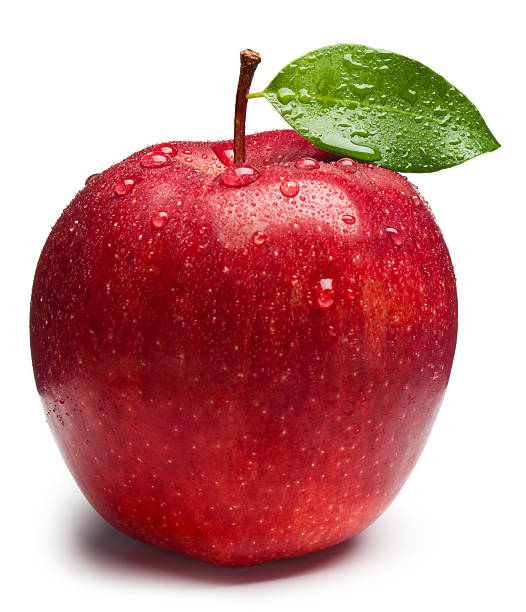

In [5]:
cvImShow(img) # This looks like a HD image

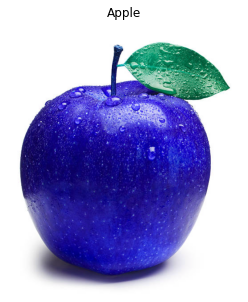

In [6]:
plt.figure(figsize=(8,5))
plt.imshow(img) # With matplotlib 
plt.axis("off")
plt.title("Apple")
plt.show()

The `color` is `changed`, this is because $OpenCV$ and $Matplotlib$ have `different` image `reading styles`.

---

$Reading$ $Videos$
---

In [7]:
VideoPath = "/content/videoplayback.mp4"

In [8]:
Capture = cv.VideoCapture(VideoPath)

As `video` is a `collection of frames` we have to `load` it `frame by frame`.

In [9]:
# while True:
#   isTrue, frame = Capture.read()
#   cvImShow(frame)
#   if cv.waitKey(20) & 0xFF==ord('d'):
#     break
# Capture.release()
# cv.destroyAllWindows()

# # This will not work in Colab, it will output each and every frame.

$Resize$ & $Rescale$
---

In [10]:
def resize_img_scale(image,scale=0.75):
  height = int(image.shape[0] * scale)
  width = int(image.shape[1] * scale)
  new_dimensions = (height, width)
  return cv.resize(image, new_dimensions, interpolation=cv.INTER_AREA)

In [11]:
path = '/content/A (3).jpg'
img = cv.imread(path)
# img = img / 255.0 # This is rescaling.

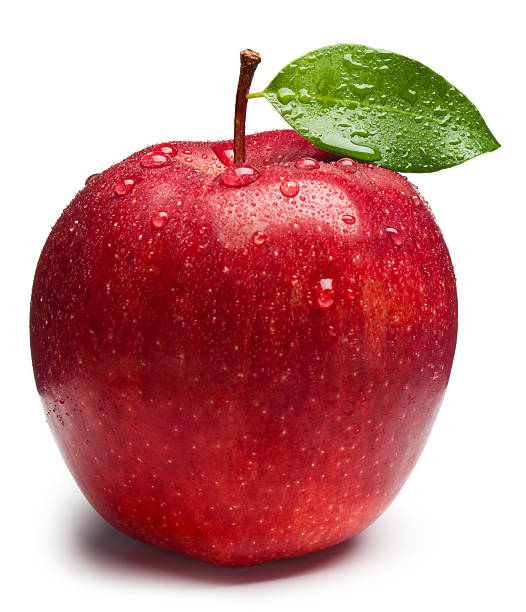

In [12]:
cvImShow(img)

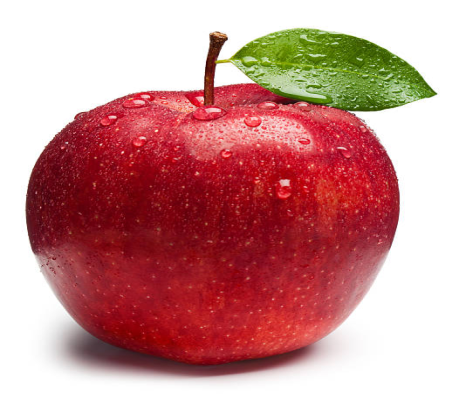

In [13]:
  resized_img_scale = resize_img_scale(img)
cvImShow(resized_img_scale)

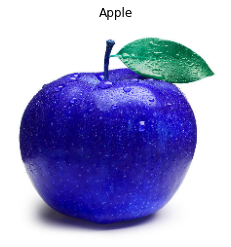

In [14]:
# Using Tensorflow
ResizedTF_img = image.resize(img,(224,224))
plt.imshow(np.array(ResizedTF_img).astype('uint8'))
plt.axis("off")
plt.title("Apple")
plt.show()

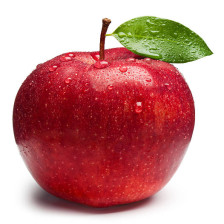

In [15]:
# The TF one in CV 
def resize_img_dim(image,dim):
  return cv.resize(image, dim, interpolation=cv.INTER_AREA)
resized_img_dim = resize_img_dim(img,(224,224))
cvImShow(resized_img_dim)

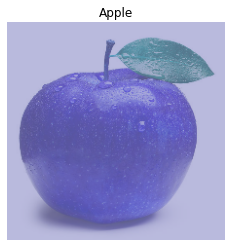

In [16]:
# Using Tensorflow
ResizedTF_img = image.resize(img,(224,224))
ResizedTF_img = image.random_contrast(ResizedTF_img,0,0.5) # Random Value from 0 to 0.5
plt.imshow(np.array(ResizedTF_img).astype('uint8'))
plt.axis("off")
plt.title("Apple")
plt.show()

We will `look` for `all manipulations` in the `end` of the `notebook`.

---

#$ColorManipulation$ & $DrawBoxes$
---

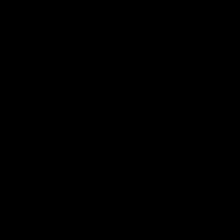

In [17]:
blank = np.zeros((224,224,3),dtype="uint8")
cvImShow(blank)

##$ColorFill$
---

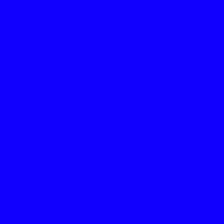

In [18]:
blank[:] = 255,0,20 #BGR 
cvImShow(blank)

##$Square$
---

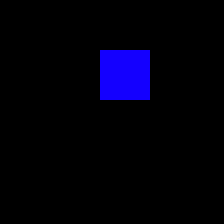

In [19]:
blank = np.zeros((224,224,3),dtype="uint8")
blank[50:100,100:150] = 255,0,20 #BGR 
cvImShow(blank)

##$Rectangle$

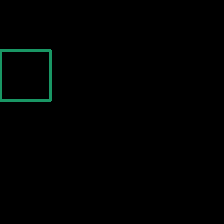

In [20]:
blank = np.zeros((224,224,3),dtype="uint8")
cv.rectangle(blank,(0,50),(50,100),(100,150,25),thickness=2) # Like Bounding Boxes
cvImShow(blank)

$Filled$

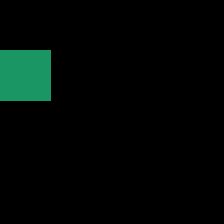

In [21]:
blank = np.zeros((224,224,3),dtype="uint8")
cv.rectangle(blank,(0,50),(50,100),(100,150,25),thickness=cv.FILLED) # Like filled squares
cvImShow(blank)

##$Circle$

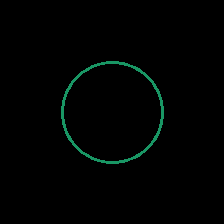

In [22]:
blank = np.zeros((224,224,3),dtype="uint8")
cv.circle(blank,(112,112),50,(100,150,25),thickness=2)
cvImShow(blank)

##$Line$

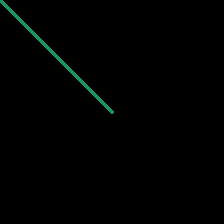

In [23]:
blank = np.zeros((224,224,3),dtype="uint8")
cv.line(blank,(0,0),(112,112),(100,150,25),thickness=2)
cvImShow(blank)

##$Text$

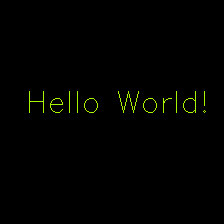

In [24]:
blank = np.zeros((224,224,3),dtype="uint8")
cv.putText(blank,"Hello World!",(25,112),cv.FONT_ITALIC,1.0,(0,245,168),thickness=1)
cvImShow(blank)

#$Essential$ $Function$

> `Functions you will majorly encounter in Deep Computer Vision`


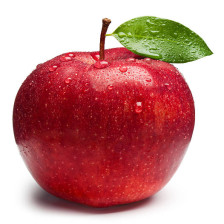

In [25]:
img_path = '/content/A (3).jpg'
img = cv.imread(img_path)
img = cv.resize(img,(224,224),interpolation=cv.INTER_AREA)
cvImShow(img)

##$Cnvt$ $to$ $GrayScale$

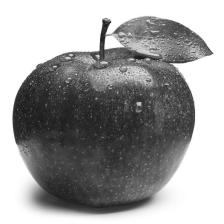

In [26]:
gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cvImShow(gray_img)

##$Blur$

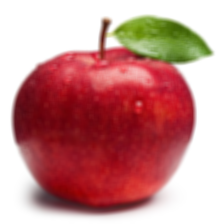

In [27]:
blur_img = cv.GaussianBlur(img,(5,5),cv.BORDER_DEFAULT) # By inc. the ksize we change the blur intensity
cvImShow(blur_img)

##$Edges$

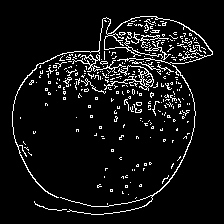

In [28]:
canny = cv.Canny(img,150,200)
cvImShow(canny)

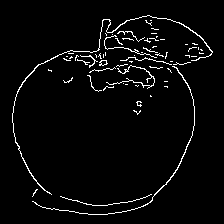

In [29]:
canny_blur = cv.Canny(blur_img,100,120)
cvImShow(canny_blur)

#$Image$ $Transformations$

In [30]:
img_path = '/content/A (3).jpg'
img = cv.imread(img_path)
img = cv.resize(img,(224,224),interpolation=cv.INTER_AREA)
# cvImShow(img)

##$Rotation$

In [31]:
# OpenCV
def rotate(image, angle, rotPoint=None):
  dims = (image.shape[0],image.shape[1])
  if rotPoint is None:
    rotPoint = (dims[0]//2,dims[1]//2)
  rotMat = cv.getRotationMatrix2D(rotPoint,angle,scale=1.0)
  return cv.warpAffine(image,rotMat,dims)

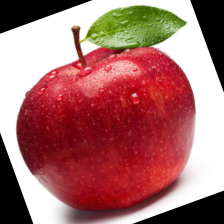

In [32]:
rotated_img = rotate(img,20) # angle is in degrees
cvImShow(rotated_img)

##$Flipping$

* $0 =>$ `Horizontally`
* $1 =>$ `vertically`
* $-1 =>$ `Both`

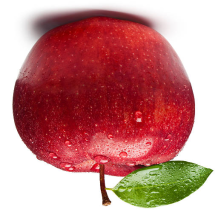

In [33]:
fliped_vert = cv.flip(img,0) 
cvImShow(fliped_vert)

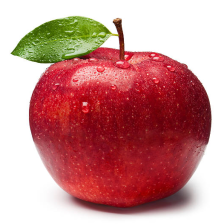

In [34]:
fliped_hort = cv.flip(img,1) 
cvImShow(fliped_hort)

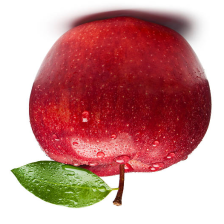

In [35]:
fliped_both = cv.flip(img,-1) 
cvImShow(fliped_both)

$TensorFlow$

$Note :$
> Here it is `not confirmed` that the `image` will be `fliped`.

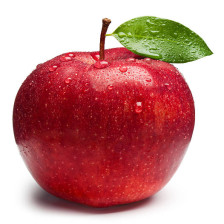

In [36]:
random_flip = image.random_flip_left_right(img,42)
cvImShow(np.array(random_flip).astype('uint8'))

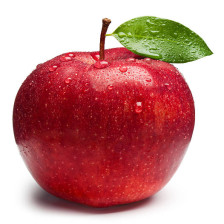

In [37]:
random_flip = image.random_flip_up_down(img,42)
cvImShow(np.array(random_flip).astype('uint8'))

##$Cropping$

    size = [crop_height, crop_width, 3]

It can `crop any part` of the `image` with the `size as given`.

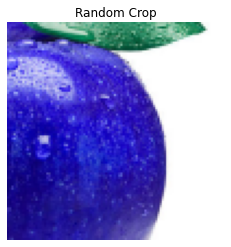

In [38]:
crop_img = image.random_crop(img,[100,100,3],seed=42)
plt.imshow(crop_img)
plt.axis("off")
plt.title("Random Crop")
plt.show()

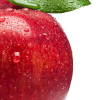

In [39]:
crop_img = np.array(crop_img).astype('uint8')
cvImShow(crop_img)

#$Contour$ $Detection$

---
$Cntour$ $:$ an `outline` representing or `bounding` the `shape` or form of `something`.

In [40]:
img_path = '/content/A (3).jpg'
img = cv.imread(img_path)
img = cv.resize(img,(224,224),interpolation=cv.INTER_AREA)
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# cvImShow(img)

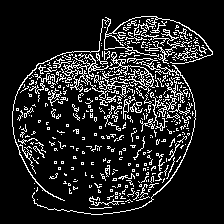

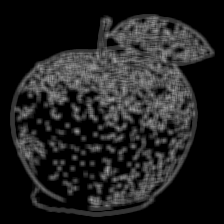

In [41]:
canny = cv.Canny(img,50,100) # The Edge Detector
cvImShow(canny)
blur = cv.GaussianBlur(canny,(5,5),cv.BORDER_DEFAULT)
cvImShow(blur)

In [42]:
contours, hierarchies = cv.findContours(blur,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
num_contours = len(contours)
num_contours

1

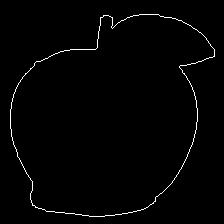

In [43]:
blank = np.zeros(img.shape,dtype='uint8')
cv.drawContours(blank,contours,-1,(255,255,0),thickness=1)
cvImShow(blank)

#$Color$ $Spaces$

In [44]:
img_path = '/content/A (3).jpg'
img = cv.imread(img_path)
img = cv.resize(img,(224,224),interpolation=cv.INTER_AREA)
# cvImShow(img)

$BGR2GRAY$

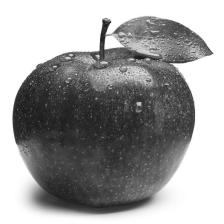

In [45]:
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cvImShow(img_gray)

$BGR2HSV$

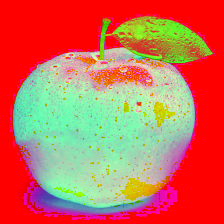

In [46]:
img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
cvImShow(img_hsv)

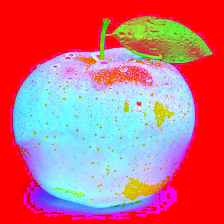

In [47]:
img_hsv_full = cv.cvtColor(img,cv.COLOR_BGR2HSV_FULL)
cvImShow(img_hsv_full)

$BGR2LAB$

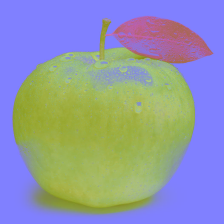

In [48]:
img_lab = cv.cvtColor(img,cv.COLOR_BGR2LAB)
cvImShow(img_lab)

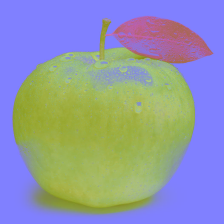

In [49]:
img_lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)
cvImShow(img_lab)

$BGR2RGB$

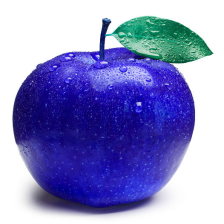

In [50]:
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # So now you know why TF's Apple was blue
cvImShow(img_rgb)

#$ColorChannels$

In [51]:
img_path = '/content/A (3).jpg'
img = cv.imread(img_path)
img = cv.resize(img,(224,224),interpolation=cv.INTER_AREA)
# cvImShow(img)

In [52]:
b,g,r = cv.split(img)

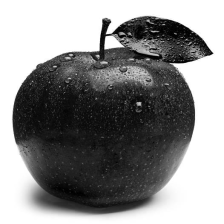

In [53]:
cvImShow(b)

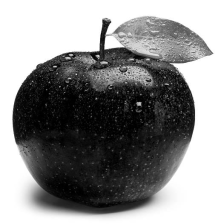

In [54]:
cvImShow(g)

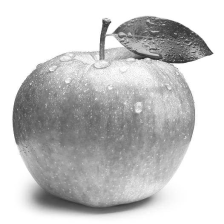

In [55]:
cvImShow(r)

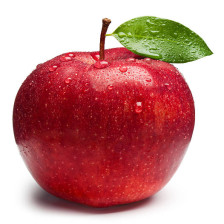

In [56]:
merged = cv.merge([b,g,r])
cvImShow(merged)

#$Bluring$ & $Smoothing$ $Techniques$

* $Smoothing$ is done in `order` to `remove` the `extra noise` from the `image`.
* $Bluring$ is done in `order` to `add` the `extra noise` from the `image`.

In [57]:
img_path = '/content/A (3).jpg'
img = cv.imread(img_path)
img = cv.resize(img,(224,224),interpolation=cv.INTER_AREA)
# cvImShow(img)

$Average$

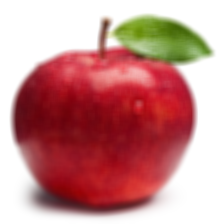

In [58]:
avg_Blur_img = cv.blur(img,(7,7),cv.BORDER_DEFAULT)
cvImShow(avg_Blur_img)

$Gaussian$

> `Blur less than the Average`

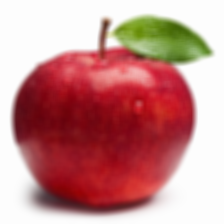

In [59]:
gauss_Blur_img = cv.GaussianBlur(img,(7,7),cv.BORDER_DEFAULT)
cvImShow(gauss_Blur_img)

$Median$ $Blur$

> `Generally better then both of them`

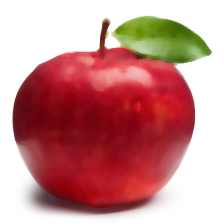

In [60]:
median_Blur_img = cv.medianBlur(img,7) # OpenCV will assume the kernel size to be (3,3)
cvImShow(median_Blur_img)

It's more like a `smoothner`.

$Bilatral$ $Blur$
> `Most Effective` and essentially used for $Advance$ $Computer$ $Vision$

*  $d$ : `Diameter` of the `circle space`
* $Sigma$ $Color$ $:$ like the `clusters` of `colors`
* $Sigma$ $Space$ $:$ A `high value` means the `pixels` away from the `current pixel` also `influence` the `blurring`.1


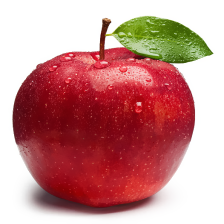

In [61]:
bilateral_Blur_img = cv.bilateralFilter(img,10,15,15) 
cvImShow(bilateral_Blur_img)

I `can't see` much `difference`, $MedianBlur$ was way `better`.

#$Bitwise$ $Operator$

In [62]:
blank = np.zeros((224,224),dtype="uint8")

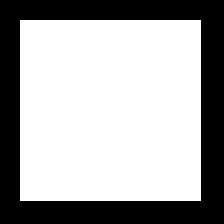

In [63]:
rectangle = cv.rectangle(blank.copy(),(20,20),(200,200),(255,200,0),thickness=-1)
cvImShow(rectangle)

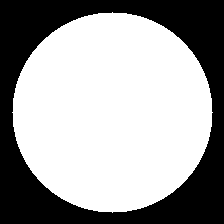

In [64]:
circle = cv.circle(blank.copy(),(112,112),100,(255,255,255),thickness=-1)
cvImShow(circle)

$Bitwise$ $AND$

> Only Intersections

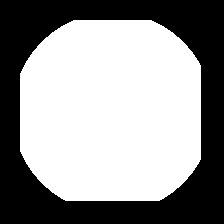

In [65]:
bitwise_and = cv.bitwise_and(rectangle,circle)
cvImShow(bitwise_and)

$Bitwise$ $OR$

> Both Intersecting and Non-Intersecting Regions

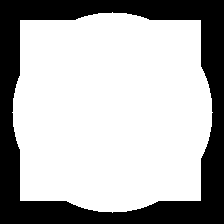

In [66]:
bitwise_or = cv.bitwise_or(rectangle,circle)
cvImShow(bitwise_or)

$Bitwise$ $XOR$

> Non - Intersecting Regions

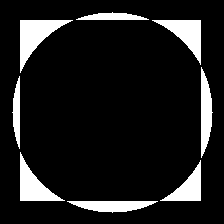

In [67]:
bitwise_xor = cv.bitwise_xor(rectangle,circle)
cvImShow(bitwise_xor)

$Bitwise$ $NOT$

> The region that is not included

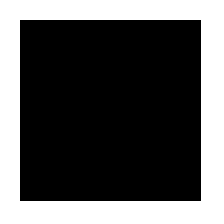

In [68]:
bitwise_not = cv.bitwise_not(rectangle,circle)
cvImShow(bitwise_not)

#$Masking$

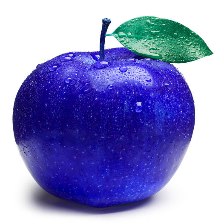

In [69]:
apple = cv.imread("/content/A (3).jpg")
apple = cv.resize(apple,(224,224),cv.BORDER_DEFAULT)
apple = cv.cvtColor(apple,cv.COLOR_BGR2RGB)
cvImShow(apple)

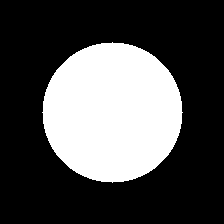

In [70]:
circle = cv.circle(np.zeros((224,224),dtype="uint8"),(112,112),70,255,-1)
cvImShow(circle)

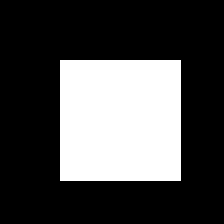

In [71]:
rect = cv.rectangle(np.zeros((224,224),dtype="uint8"),(60,60),(180,180),255,-1)
cvImShow(rect)

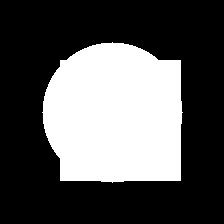

In [72]:
unknown_shape = cv.bitwise_or(circle,rect)
cvImShow(unknown_shape)

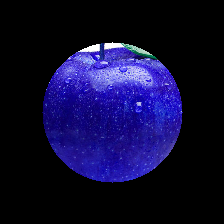

In [73]:
masked = cv.bitwise_and(apple,apple,mask=circle)
cvImShow(masked)

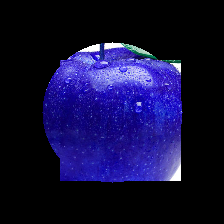

In [74]:
masked = cv.bitwise_and(apple,apple,mask=unknown_shape)
cvImShow(masked)

#$Histogrmas$

##$GrayScale$ $Hist$

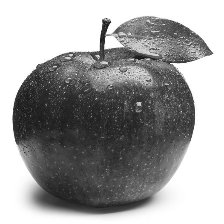

In [75]:
apple = cv.imread("/content/A (3).jpg")
apple = cv.resize(apple,(224,224),cv.BORDER_DEFAULT)
apple = cv.cvtColor(apple,cv.COLOR_BGR2GRAY)
cvImShow(apple)

In [76]:
blank = np.zeros((224,224),dtype='uint8')
mask = cv.circle(blank.copy(),(112,112),50,255,-1)

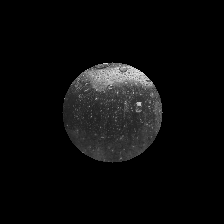

In [77]:
masked = cv.bitwise_and(apple,apple,mask=mask)
cvImShow(masked)

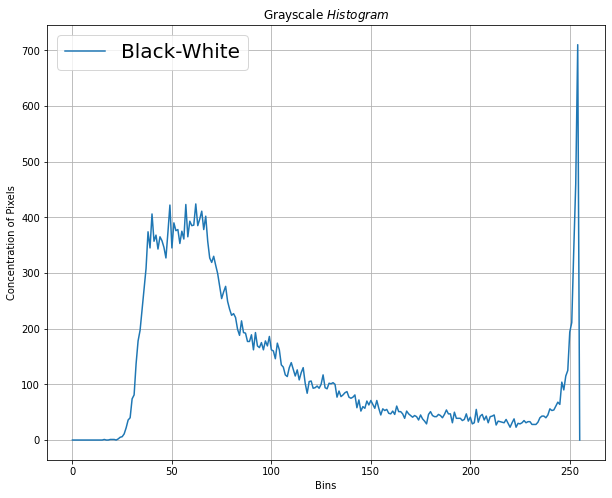

In [78]:
from numpy.core.fromnumeric import size
hist = cv.calcHist([apple],[0],mask=None,histSize=[256],ranges=[0,255])
plt.figure(figsize=(10,8))
plt.plot(hist,label="Black-White")
plt.title("Grayscale $Histogram$")
plt.xlabel("Bins")
plt.ylabel("Concentration of Pixels")
plt.legend(prop={'size': 20})
plt.grid()
plt.show()

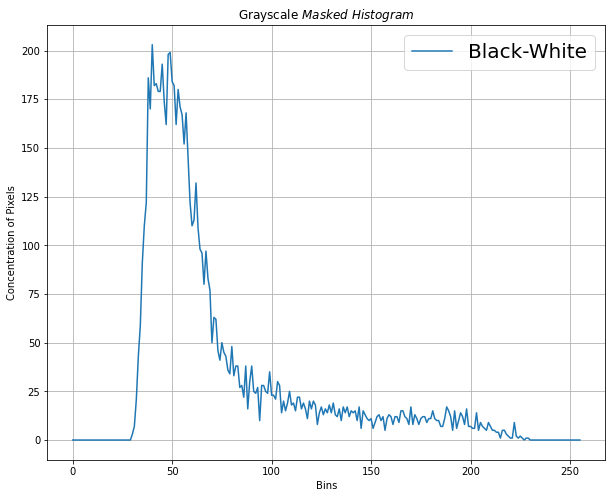

In [79]:
from numpy.core.fromnumeric import size
hist = cv.calcHist([apple],[0],mask=mask,histSize=[256],ranges=[0,255])
plt.figure(figsize=(10,8))
plt.plot(hist,label="Black-White")
plt.title("Grayscale $Masked$ $Histogram$")
plt.xlabel("Bins")
plt.ylabel("Concentration of Pixels")
plt.legend(prop={'size': 20})
plt.grid()
plt.show()

##$Color$ $Hist$

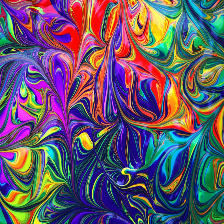

In [84]:
apple = cv.imread("//content/df.jfif")
apple = cv.resize(apple,(224,224),cv.BORDER_DEFAULT)
cvImShow(apple)

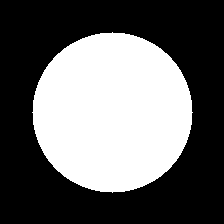

In [85]:
blank = np.zeros((224,224),dtype='uint8')
circle = cv.circle(blank.copy(),(112,112),80,255,-1)
cvImShow(circle)

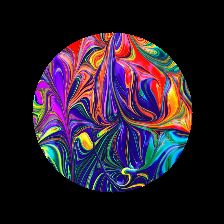

In [86]:
masked = cv.bitwise_and(apple,apple,mask=circle)
cvImShow(masked)

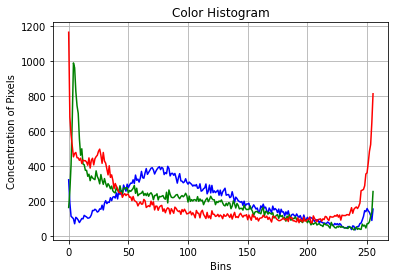

In [87]:
colors = ("b","g","r")
for i,col in enumerate(colors):
  hist = cv.calcHist([apple],[i],mask=None,histSize=[256],ranges=[0,256])
  plt.plot(hist,color=col)
  plt.title("Color Histogram")
  plt.xlabel("Bins")
  plt.ylabel("Concentration of Pixels")
  plt.grid()

plt.show()
  

#$Threshold$

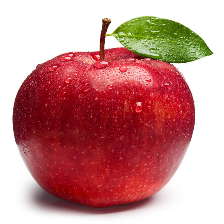

In [95]:
apple = cv.imread("/content/A (3).jpg")
apple = cv.resize(apple,(224,224),cv.BORDER_DEFAULT)
cvImShow(apple)

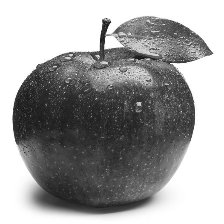

In [96]:
gray = cv.cvtColor(apple, cv.COLOR_BGR2GRAY)
cvImShow(gray)

##$Simple$ $Threshold$

In [97]:
threshold, thresh = cv.threshold(gray,225//2, 225,cv.THRESH_BINARY) # if x > 112.0 set to 255
threshold

112.0

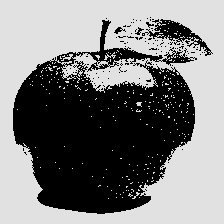

In [98]:
cvImShow(thresh)

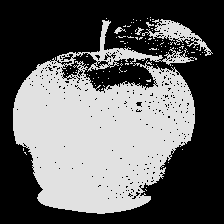

In [99]:
threshold, thresh_inv = cv.threshold(gray,225//2, 225,cv.THRESH_BINARY_INV) # is x < 112.0 set to 255
cvImShow(thresh_inv)

##$Adaptive$ $Threshold$

* $Block$ $size$ is the $kernel$ $size$.
* $C$ is a `constant` subtracted from the `mean`.

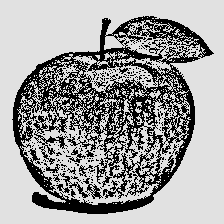

In [100]:
adaptive_thresh = cv.adaptiveThreshold(gray,225,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,3) 
cvImShow(adaptive_thresh)

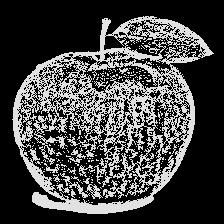

In [103]:
adaptive_thresh_inv = cv.adaptiveThreshold(gray,225,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV,11,3) 
cvImShow(adaptive_thresh_inv)

#$Edge$ $Detection$

In [104]:
apple = cv.imread("/content/A (3).jpg")
apple = cv.resize(apple,(224,224),interpolation=cv.INTER_AREA)
apple_gray = cv.cvtColor(apple,cv.COLOR_BGR2GRAY)

##$Canny$

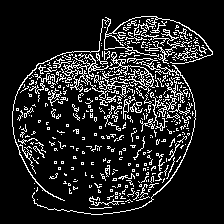

In [112]:
canny = cv.Canny(apple_gray,50,100)
cvImShow(canny)

##$Laplacion$

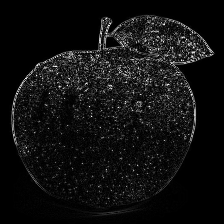

In [117]:
lap = cv.Laplacian(apple_gray,cv.CV_64F)
lap = np.uint8(np.abs(lap))
cvImShow(lap)

##$Sobel$

In [119]:
sobelx =  cv.Sobel(apple_gray,cv.CV_64F,1,0)
sobely =  cv.Sobel(apple_gray,cv.CV_64F,0,1)

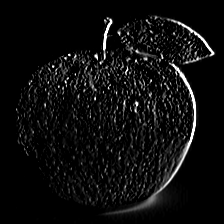

In [121]:
cvImShow(sobelx)

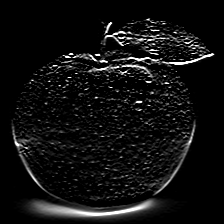

In [122]:
cvImShow(sobely)

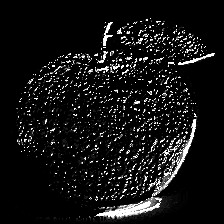

In [128]:
combined_sobelxy = cv.bitwise_or(sobelx,sobely)
cvImShow(combined_sobelxy)